# What is the distribution of paper lengths in CSCW?
by R. Stuart Geiger ([@staeiou](http://twitter.com/staeiou)), staff ethnographer, [Berkeley Institute for Data Science](http://bids.berkeley.edu)

Freely licensed under both [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and [The MIT License](https://opensource.org/licenses/MIT).

## Introduction
In 2013, the ACM conference on Computer-Supported Cooperative Work (CSCW) removed a strict page limit, which had previously set the length for full papers at 10 pages and notes at 4 pages. Officially, papers can now be any length, from one page to infinity (or whatever the system supports). However, CSCW authors and reviewers [are told that](https://cscw.acm.org/2016/submit/papers.php) "Papers whose length is incommensurate with their contribution will be rejected." So what is the new normal for page lengths? 

I am exploring this question in this Jupyter notebook, as well as trying to document my data collection, processing, and analysis in as open and reproducible as a manner as I can. I am using a mix of bash commands and python scripts to process and collect the data.


## Data collection and processing
Import libraries we will use: Pandas and Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
%matplotlib inline
sns.set(font_scale=2)

## Number of pages

In [2]:
import glob
from PyPDF2 import PdfFileReader

In [3]:
years = list(range(2010,2019))
years.append(2000)
years.append(2002)
years.append(2004)
years.append(2006)
years.append(2008)
years.append(2017.5)
years.sort()
years

[2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2017.5,
 2018]

In [4]:
pages_list = []
for year in years:
    print(year)
    for pdf in glob.glob("data/pdfs/" + str(year) + "/*.pdf"):
        pdf_obj = PdfFileReader(open(pdf,'rb'), strict=False)
        num_pages = pdf_obj.getNumPages()
        orientation = pdf_obj.getPage(0).get('/Rotate')
        row = {'filename':pdf[10:-4],'year':year,'num_pages':num_pages,'orientation':orientation}
        pages_list.append(row)

2000
2002
2004
2006
2008
2010
2011
2012
2013
2014
2015
2016
2017
2017.5
2018


In [5]:
df_pages = pd.DataFrame(pages_list).set_index('filename')
df_pages[0:5]

,num_pages,orientation,year
filename,,,
2000/p1-boyle,10,0.0,2000.0
2000/p107-litiu,10,0.0,2000.0
2000/p11-jackson,10,0.0,2000.0
2000/p117-roussev,10,0.0,2000.0
2000/p127-he,8,0.0,2000.0


In [6]:
gb = df_pages.groupby('year')
pd.DataFrame(gb['num_pages'].value_counts(sort=False))
#df_pages.num_pages.value_counts()

num_pages
year   num_pages           
2000.0 8                  7
       9                  2
       10                27
2002.0 8                  3
       9                  3
       10                33
2004.0 3                  1
       4                 22
       7                  1
       8                  2
       9                  2
       10                48
2006.0 4                 15
       8                  1
       9                  2
       10                43
2008.0 4                 22
       9                  1
       10                62
       11                 1
2010.0 4                 22
       9                  2
       10                34
2011.0 1                  1
       2                  9
       4                 49
       7                  2
       8                  7
       10                44
2012.0 1                  1
...                     ...
2017.5 17                 8
       18                17
       19                12
       20                 6
       21                19
       22                13
       23                 5
       24                 5
       25                 2
       26                 3
       27                 2
       33                 1
2018.0 12                 1
       15                 2
       16                 6
       17                 3
       18                18
       19                13
       20                17
       21                18
       22                22
       23                21
       24                15
       25                13
       26                10
       27                10
       28                 7
       29                 6
       31                 1
       34                 2

[130 rows x 1 columns]

Text(0.5, 0.98, 'Boxplots for length of CSCW papers over time')

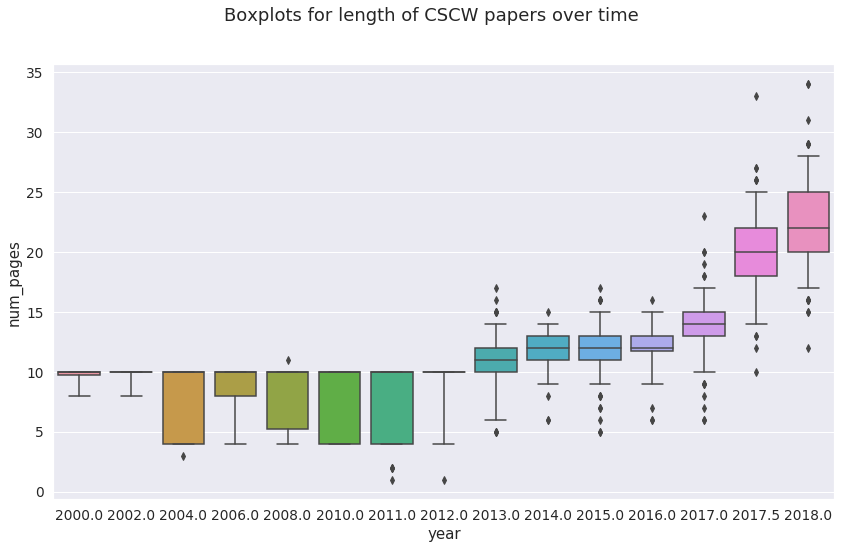

In [7]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=[14,8])
sns.boxplot(data=df_pages.dropna().query("orientation == 0"), y='num_pages', x='year', whis=[5,95], ax=ax)
plt.suptitle("Boxplots for length of CSCW papers over time")

## Word counts!

In [8]:
!unzip -o data/docx/corrected.zip -d data/docx

Archive:  data/docx/corrected.zip
  inflating: data/docx/2004/p192-bardram.docx  
  inflating: data/docx/2008/p559-christensen.docx  
  inflating: data/docx/2014/p134-steinhardt.docx  
  inflating: data/docx/2014/p733-ehrlich.docx  
  inflating: data/docx/2015/p1139-coetzee.docx  
  inflating: data/docx/2015/p1277-eschler.docx  
  inflating: data/docx/2016/26_ichino.docx  
  inflating: data/docx/2016/466_arif.docx  
  inflating: data/docx/2016/648_leavitt.docx  
  inflating: data/docx/2017.5/a064-kumar.docx  
  inflating: data/docx/2017/p126-mitra.docx  
  inflating: data/docx/2017/p480-poretski.docx  
  inflating: data/docx/2018/cscw124-miller-hillberg.docx  
  inflating: data/docx/2018/cscw133-panger.docx  
  inflating: data/docx/2018/cscw194-zhu.docx  


In [9]:
!find data/docx/ -name "*.docx" -exec sh -c 'pandoc "${0}" -t plain -o "${0%}.txt"' {} \;


In [10]:
# This command replaces all punctuation with spaces, which I ended up not choosing to do.

#!find data/docx/ -name "*.docx.txt" -exec sed -i 's/[[:punct:]]/ /g' {} \;


In [11]:
!rm -rf data/txt
!mkdir data/txt

In [12]:
!cp -r data/docx/* data/txt/

In [13]:
!find data/txt/ -name "*.docx" -type f -delete 

In [14]:
%%bash
rm -rf data/word_counts/
mkdir data/word_counts/
for year in {2000,2002,2004,2006,2008,{2010..2017},2017.5,2018}
do
    wc -w data/txt/$year/*.docx.txt | sed 's/^ *//' | head -n -1 > data/word_counts/cscw-$year-pages.csv
done

In [15]:
!ls data/word_counts

cscw-2000-pages.csv  cscw-2010-pages.csv  cscw-2015-pages.csv
cscw-2002-pages.csv  cscw-2011-pages.csv  cscw-2016-pages.csv
cscw-2004-pages.csv  cscw-2012-pages.csv  cscw-2017.5-pages.csv
cscw-2006-pages.csv  cscw-2013-pages.csv  cscw-2017-pages.csv
cscw-2008-pages.csv  cscw-2014-pages.csv  cscw-2018-pages.csv


In [16]:
!head data/word_counts/cscw-2000-pages.csv

6217 data/txt/2000/p107-litiu.docx.txt
8303 data/txt/2000/p117-roussev.docx.txt
8651 data/txt/2000/p11-jackson.docx.txt
5845 data/txt/2000/p127-he.docx.txt
10502 data/txt/2000/p135-cadiz.docx.txt
7227 data/txt/2000/p145-singley.docx.txt
4914 data/txt/2000/p155-kuzuoka.docx.txt
4807 data/txt/2000/p163-yano.docx.txt
10019 data/txt/2000/p171-vidot.docx.txt
8108 data/txt/2000/p181-mauve.docx.txt


In [17]:
!head data/word_counts/cscw-2018-pages.csv

11640 data/txt/2018/cscw017-alvarado-garcia.docx.txt
12684 data/txt/2018/cscw018-ames.docx.txt
15910 data/txt/2018/cscw019-andalibi.docx.txt
14165 data/txt/2018/cscw020-arif.docx.txt
8642 data/txt/2018/cscw021-asthana.docx.txt
10857 data/txt/2018/cscw022-august.docx.txt
11533 data/txt/2018/cscw023-baumer.docx.txt
13216 data/txt/2018/cscw024-berenberg.docx.txt
10334 data/txt/2018/cscw025-buntain.docx.txt
14266 data/txt/2018/cscw026-buyuktur.docx.txt


## Merge dataframes, spot check

In [18]:
df_words = pd.DataFrame(columns=["filename","year", "words"])

for year in years:
    df_year = pd.read_csv("data/word_counts/cscw-"+ str(year) + "-pages.csv", sep=" ", names=["words", "filename"])
    
    for idx, row in df_year.iterrows():
        df_words = df_words.append({"filename":row['filename'][9:-9], "year": str(year), "words":row['words']}, ignore_index=True)

In [19]:
df_words.words = df_words.words.astype(int)

In [20]:
gb = df_words.groupby("year")
pd.DataFrame(gb.describe())

words                                                                  \
        count          mean          std     min       25%      50%       75%   
year                                                                            
2000     36.0   7734.583333  1639.807521  4807.0   6687.75   7905.5   8702.75   
2002     39.0   8004.205128   934.713893  5945.0   7483.00   8063.0   8559.00   
2004     76.0   7238.263158  2723.627803  2052.0   3901.00   8248.0   9391.00   
2006     61.0   7805.754098  2538.826387  2882.0   7193.00   9126.0   9484.00   
2008     86.0   7074.918605  2444.979366  2428.0   4177.25   8082.5   8776.25   
2010     58.0   6540.603448  2685.134052  2757.0   3423.25   7889.5   8874.50   
2011    112.0   4714.035714  3217.590251   229.0   1589.75   3466.0   8017.75   
2012    165.0   7299.757576  2403.567770   492.0   7282.00   8237.0   8836.00   
2013    139.0   8961.510791  2085.197726  3821.0   7995.00   9189.0  10005.00   
2014    134.0   9793.194030  1685.812972  5182.0   8690.75   9745.0  10767.00   
2015    161.0   9840.695652  1998.101146  3194.0   8677.00   9822.0  10995.00   
2016    140.0  10358.550000  1727.920255  4666.0   9385.75  10303.0  11316.00   
2017    183.0  11367.803279  2225.448409  4693.0  10158.00  11159.0  12489.00   
2017.5  105.0  12322.714286  2271.654335  5868.0  10989.00  12209.0  13769.00   
2018    185.0  13118.140541  2669.746133  6541.0  11503.00  12898.0  14657.00   

                 
            max  
year             
2000    11024.0  
2002     9721.0  
2004    10883.0  
2006    10616.0  
2008    11016.0  
2010    10036.0  
2011     9824.0  
2012    11165.0  
2013    16007.0  
2014    14772.0  
2015    15432.0  
2016    16225.0  
2017    19697.0  
2017.5  20744.0  
2018    25369.0

In [21]:
df_words = df_words.set_index('filename')

In [22]:
df_words['year_float'] = df_words['year'].astype(float)

In [23]:
df_words[0:5]

,year,words,year_float
filename,,,
2000/p107-litiu,2000,6217,2000.0
2000/p117-roussev,2000,8303,2000.0
2000/p11-jackson,2000,8651,2000.0
2000/p127-he,2000,5845,2000.0
2000/p135-cadiz,2000,10502,2000.0


In [24]:
df_words.query("year>'2012'").sort_values('words')

,year,words,year_float
filename,,,
2015/p1153-diakopoulos,2015,3194,2015.0
2013/p1481-lee,2013,3821,2013.0
2013/p1285-kinnaird,2013,4053,2013.0
2013/p803-gilbert,2013,4068,2013.0
2013/p471-colineau,2013,4436,2013.0
2013/p1463-robson,2013,4449,2013.0
2013/p753-teevan,2013,4479,2013.0
2013/p1499-saket,2013,4632,2013.0
2015/p1359-vashistha,2015,4658,2015.0


### Characters

In [25]:
%%bash
rm -rf data/char_counts/
mkdir data/char_counts/
for year in {2000,2002,2004,2006,2008,{2010..2017},2017.5,2018}
do
    wc -m data/txt/$year/*.docx.txt | sed 's/^ *//' | head -n -1 > data/char_counts/cscw-$year-pages.csv
done

In [26]:
!ls data/char_counts

cscw-2000-pages.csv  cscw-2010-pages.csv  cscw-2015-pages.csv
cscw-2002-pages.csv  cscw-2011-pages.csv  cscw-2016-pages.csv
cscw-2004-pages.csv  cscw-2012-pages.csv  cscw-2017.5-pages.csv
cscw-2006-pages.csv  cscw-2013-pages.csv  cscw-2017-pages.csv
cscw-2008-pages.csv  cscw-2014-pages.csv  cscw-2018-pages.csv


In [27]:
!head data/char_counts/cscw-2000-pages.csv

41968 data/txt/2000/p107-litiu.docx.txt
56872 data/txt/2000/p117-roussev.docx.txt
55392 data/txt/2000/p11-jackson.docx.txt
38047 data/txt/2000/p127-he.docx.txt
71989 data/txt/2000/p135-cadiz.docx.txt
49436 data/txt/2000/p145-singley.docx.txt
32546 data/txt/2000/p155-kuzuoka.docx.txt
31414 data/txt/2000/p163-yano.docx.txt
61345 data/txt/2000/p171-vidot.docx.txt
50189 data/txt/2000/p181-mauve.docx.txt


In [28]:
df_chars = pd.DataFrame(columns=["filename","year", "characters"])

for year in years:
    df_year = pd.read_csv("data/char_counts/cscw-"+ str(year) + "-pages.csv", sep=" ", names=["characters", "filename"])
    
    for idx, row in df_year.iterrows():
        df_chars = df_chars.append({"filename":row['filename'][9:-9], "year": str(year), "characters":row['characters']}, ignore_index=True)

In [29]:
df_chars.characters = df_chars.characters.astype(int)

In [30]:
gb = df_chars.groupby("year")
pd.DataFrame(gb.describe())

characters                                                          \
            count          mean           std      min       25%      50%   
year                                                                        
2000         36.0  51632.944444  10917.177325  31414.0  44250.75  52340.5   
2002         39.0  52686.820513   6062.534835  40280.0  51126.00  52626.0   
2004         76.0  48194.868421  17925.229634  14651.0  26284.00  55146.5   
2006         61.0  52902.721311  17410.809602  19381.0  48482.00  59490.0   
2008         86.0  47714.465116  16245.693561  16072.0  29488.00  54008.0   
2010         58.0  44040.844828  17811.964849  17401.0  23645.00  53264.0   
2011        112.0  31913.276786  21200.007561   1562.0  11479.50  24868.0   
2012        165.0  49446.612121  16100.404055   3588.0  48153.00  55549.0   
2013        139.0  60964.618705  15340.184621  24855.0  54862.50  60577.0   
2014        134.0  66046.365672  11579.261730  34730.0  58182.00  65545.0   
2015        161.0  66888.416149  14674.815926  21074.0  58079.00  65569.0   
2016        140.0  71444.035714  12762.326539  30838.0  63780.75  71159.5   
2017        183.0  79511.759563  17855.785175  32730.0  68591.50  76635.0   
2017.5      105.0  89278.600000  18987.811251  39691.0  77189.00  88326.0   
2018        185.0  93170.102703  20145.820562  46152.0  80969.00  90779.0   

                             
              75%       max  
year                         
2000     57231.50   75589.0  
2002     56588.50   64364.0  
2004     63221.50   76319.0  
2006     63951.00   73641.0  
2008     59511.50   70980.0  
2010     58438.50   70100.0  
2011     53361.25   66142.0  
2012     59390.00   75908.0  
2013     67990.50  127838.0  
2014     72960.25   97173.0  
2015     75185.00  126186.0  
2016     78078.50  126231.0  
2017     86618.00  142815.0  
2017.5   99415.00  155707.0  
2018    105957.00  176635.0

In [31]:
df_chars = df_chars.set_index('filename')

In [32]:
df_chars[0:5]

,year,characters
filename,,
2000/p107-litiu,2000,41968
2000/p117-roussev,2000,56872
2000/p11-jackson,2000,55392
2000/p127-he,2000,38047
2000/p135-cadiz,2000,71989


### Merge it

In [33]:
df_words[0:5], df_chars[0:5]

(                   year  words  year_float
 filename                                  
 2000/p107-litiu    2000   6217      2000.0
 2000/p117-roussev  2000   8303      2000.0
 2000/p11-jackson   2000   8651      2000.0
 2000/p127-he       2000   5845      2000.0
 2000/p135-cadiz    2000  10502      2000.0,
                    year  characters
 filename                           
 2000/p107-litiu    2000       41968
 2000/p117-roussev  2000       56872
 2000/p11-jackson   2000       55392
 2000/p127-he       2000       38047
 2000/p135-cadiz    2000       71989)

In [34]:
merged_df1 = df_words.join(df_chars, lsuffix='l_').drop('yearl_',axis=1)
merged_df1[0:5]

,words,year_float,year,characters
filename,,,,
2000/p107-litiu,6217,2000.0,2000,41968
2000/p117-roussev,8303,2000.0,2000,56872
2000/p11-jackson,8651,2000.0,2000,55392
2000/p127-he,5845,2000.0,2000,38047
2000/p135-cadiz,10502,2000.0,2000,71989


In [35]:
df_pages[0:5]

,num_pages,orientation,year
filename,,,
2000/p1-boyle,10,0.0,2000.0
2000/p107-litiu,10,0.0,2000.0
2000/p11-jackson,10,0.0,2000.0
2000/p117-roussev,10,0.0,2000.0
2000/p127-he,8,0.0,2000.0


In [36]:
merged_df = merged_df1.join(df_pages, lsuffix='l_').drop('yearl_',axis=1)
merged_df[0:5]

,words,year_float,characters,num_pages,orientation,year
filename,,,,,,
2000/p107-litiu,6217,2000.0,41968,10,0.0,2000.0
2000/p117-roussev,8303,2000.0,56872,10,0.0,2000.0
2000/p11-jackson,8651,2000.0,55392,10,0.0,2000.0
2000/p127-he,5845,2000.0,38047,8,0.0,2000.0
2000/p135-cadiz,10502,2000.0,71989,10,0.0,2000.0


In [37]:
merged_df['words_per_page'] = merged_df['words']/merged_df['num_pages']
merged_df['chars_per_word'] = merged_df['characters']/merged_df['words']

merged_df['year'] = merged_df['year'].astype(str)
merged_df['year'] = merged_df['year'].str.replace('.0', '', regex=False)

In [38]:
merged_df = merged_df[merged_df['num_pages'] > 2]
merged_df = merged_df[merged_df['words'] > 200]
merged_df[0:5]

,words,year_float,characters,num_pages,orientation,year,words_per_page,chars_per_word
filename,,,,,,,,
2000/p107-litiu,6217,2000.0,41968,10,0.0,2000,621.700,6.750523
2000/p117-roussev,8303,2000.0,56872,10,0.0,2000,830.300,6.849572
2000/p11-jackson,8651,2000.0,55392,10,0.0,2000,865.100,6.402959
2000/p127-he,5845,2000.0,38047,8,0.0,2000,730.625,6.509324
2000/p135-cadiz,10502,2000.0,71989,10,0.0,2000,1050.200,6.854790


## Get reference sections

### Get full text in dataframe

In [39]:
text_list = []
for year in years:
    #print(year)
    for txt in glob.glob("data/txt/" + str(year) + "/*.txt"):
        with open(txt,"r") as file_obj:
            paper_text = file_obj.read()
        
        row = {'filename':txt[9:-9],'paper_text':paper_text}
        text_list.append(row)

df_text = pd.DataFrame(text_list).set_index('filename')


In [40]:
df_text[0:5]

,paper_text
filename,
2000/p1-boyle,THE EFFECTS OF FILTERED VIDEO ON AWARENESS A...
2000/p107-litiu,DEVELOPING ADAPTIVE GROUPWARE APPLICATIONS U...
2000/p11-jackson,IMPACT OF VIDEO FRAME RATE ON COMMUNICATIVE ...
2000/p117-roussev,COMPOSABLE COLLABORATION INFRASTRUCTURES BAS...
2000/p127-he,DESIGNING RESENTATIONS FOR ON-DEMAND VIEWING...


In [41]:
merged_df = merged_df.join(df_text)
merged_df[0:5]

,words,year_float,characters,num_pages,orientation,year,words_per_page,chars_per_word,paper_text
filename,,,,,,,,,
2000/p107-litiu,6217,2000.0,41968,10,0.0,2000,621.700,6.750523,DEVELOPING ADAPTIVE GROUPWARE APPLICATIONS U...
2000/p117-roussev,8303,2000.0,56872,10,0.0,2000,830.300,6.849572,COMPOSABLE COLLABORATION INFRASTRUCTURES BAS...
2000/p11-jackson,8651,2000.0,55392,10,0.0,2000,865.100,6.402959,IMPACT OF VIDEO FRAME RATE ON COMMUNICATIVE ...
2000/p127-he,5845,2000.0,38047,8,0.0,2000,730.625,6.509324,DESIGNING RESENTATIONS FOR ON-DEMAND VIEWING...
2000/p135-cadiz,10502,2000.0,71989,10,0.0,2000,1050.200,6.854790,DISTAN E LEARNING THROUGH DISTRIBUTED COLLAB...


In [42]:
def find_all(needle,haystack, flags):
    return [a.start() for a in list(re.finditer(needle, haystack, flags))]

In [43]:
def get_ref_section_start(row):
    text = row['paper_text'].lower()
    regex = '^[^a-zA-Z]*(bibliography|references|reference|works cited|refefences)[^a-zA-Z]*$'
    appx_sections = find_all(regex, text, re.IGNORECASE | re.MULTILINE)
    #print(ref_sections)
    if len(appx_sections) == 1:
        return appx_sections[0]
    elif len(appx_sections) > 1:
        return appx_sections[-1]
    else:
        return False

In [44]:
def get_appx_section_start(row):
    text = row['paper_text'].lower()
    regex = '^[^a-zA-Z]*(appendix|appendices|appendixes)[^a-zA-Z]*$'
    appx_sections = find_all(regex, text, re.IGNORECASE | re.MULTILINE)
    #print(ref_sections)
    if len(appx_sections) == 1:
        return appx_sections[0]
    elif len(appx_sections) > 1:
        return appx_sections[-1]
    else:
        return False

In [45]:
df_appx_start = pd.DataFrame(merged_df.apply(get_appx_section_start, axis=1),
                            columns=['appx_start'])
df_ref_start = pd.DataFrame(merged_df.apply(get_ref_section_start, axis=1),
                            columns=['ref_start'])

In [46]:
df_appx_start.sort_values(by='appx_start', ascending=False)[0:5]

,appx_start
filename,
2017/p126-mitra,115589
2018/cscw048-emami-naeini,109000
2017/p1049-arciniegas-mendez,104624
2017/p2137-reeves,101778
2018/cscw198-zhang,99801


In [47]:
df_ref_start[0:5]

,ref_start
filename,
2000/p107-litiu,37115
2000/p117-roussev,54908
2000/p11-jackson,50490
2000/p127-he,35143
2000/p135-cadiz,68880


In [48]:
merged_df = merged_df.merge(df_appx_start, left_index=True, right_index=True)
merged_df = merged_df.merge(df_ref_start, left_index=True, right_index=True)

In [49]:
def get_appx_text(row):
    appx_start = row['appx_start']
    ref_start = row['ref_start']
    paper_text = row['paper_text']
    
    if appx_start is False:
        return ""
    elif appx_start > ref_start:
        return paper_text[appx_start:]
    else:
        return paper_text[appx_start:ref_start]

In [50]:
def get_ref_text(row):
    appx_start = row['appx_start']
    ref_start = row['ref_start']
    paper_text = row['paper_text']
    
    if appx_start is False:
        return paper_text[ref_start:]
    elif appx_start > ref_start:
        return paper_text[ref_start:appx_start]
    else:
        return paper_text[ref_start:]

#### Testing
First, for a paper with the appendix before the references:

In [51]:
get_appx_text(merged_df.loc['2018/cscw124-miller-hillberg'])[0:1000]

'\n\n\nAPPENDIX\n\n\nTable A5. Participant Gender\n\n+----------+-----------------------+---------------+---------+----------------+---------+\n|   Gender |   Twitter Impressions |   Link Clicks |   %     |   Participants |   %     |\n+==========+=======================+===============+=========+================+=========+\n|   Female |   808,861             |   4,347       |   63.6% |   512          |   72.1% |\n+----------+-----------------------+---------------+---------+----------------+---------+\n|   Male   |   490,397             |   2,394       |   35.0% |   182          |   25.6% |\n+----------+-----------------------+---------------+---------+----------------+---------+\n|   Other  |   17,202              |   97          |   1.4%  |   16           |   2.3%  |\n+----------+-----------------------+---------------+---------+----------------+---------+\n\n  TABLE A6. PARTICIPANT AGE\n\n+-------------+-------+---------+\n|   Age Group |   N   |   %     |\n+=============+=======+==

In [52]:
get_ref_text(merged_df.loc['2018/cscw124-miller-hillberg'])[0:1000]

'\n\n\nREFERENCES\n\n\n1.  Fathiya Al Rashdi. 2015. Forms and Functions of Emojis in Whatsapp\n    Interaction among Omanis. Georgetown University, Washington, DC,\n    USA.\n\n2.  Francesco Barbieri, German Kruszewski, Francesco Ronzano, and\n    Horacio Saggion. 2016. How Cosmopolitan Are Emojis?: Exploring\n    Emojis Usage and Meaning over Different Languages with\n    Distributional Semantics. In _Proceedings of the 2016 ACM on\n    Multimedia Conference_ (MM ’16), 531–535.\n    https://doi.org/10.1145/2964284.2967278\n\n3.  Francesco Barbieri, Francesco Ronzano, and Horacio Saggion. 2016.\n    What does this Emoji Mean? A Vector Space Skip-Gram Model for\n    Twitter Emojis. In _Proceedings of the Tenth International\n    Conference on Language Resources and Evaluation (LREC 2016)_.\n\n4.  Rachel Been and Agustin Fonts. 2017. Redesigning Android Emoji.\n    _Google Design_. Retrieved October 14, 2017 from\n    https://medium.com/google-design/redesigning-android-emoji-cb22e3b51cc

Then for a paper with the appendix after the references:

In [53]:
get_appx_text(merged_df.loc['2015/p218-azaria'])[0:1000]

'\n  APPENDIX\n\n  ∀_p_|_r_(_p_) = 1_,_ ∀_p_⁰|_p_⁰\n\n_p, v_(_p_) = _p_⁰ with probability 1 .\n\n_k_−1\n\n  FORMAL MODEL\n\nThe expected utility for the credible players using this equi- librium\nis given by the following binomial distribution mass\n\nIn the formal model, the Pirate Game consists of _k_ play-\n\n  function: P_k_−1\n\n  � _j_ )( 1 )_j_ · (1 − 1 )_k_−1−_j_\n\nsume _k_ 4. The identity of the pirate player is known\n\nonly to the pirate himself. The game includes two phases: the frst phase\nconsists of a communication phase where all players can discuss their\nstrategy. The communication in this phase bears no cost and is not\nbinding (“cheap talk” [13]). The second phase is a voting phase where\nall players ex- cept the pirate may simultaneously cast their vote\n_v_(_p_), where _v_ : _P p_₁ _, p_₂ _, ..., p_(k) , φ_ and _φ_ indicates\nan empty vote. It is assumed that the pirate always casts an empty vote\n_φ_. If the majority of the votes are cast against the pirate, all

In [54]:
get_ref_text(merged_df.loc['2015/p218-azaria'])[0:1000]

'\n  REFERENCES\n\n1.  Amazon. Mechanical Turk services. http://www.mturk.com/, 2012.\n\n2.  Aylett, R., Hall, L., Tazzyman, S., Endrass, B., Andre´, E., Ritter,\n    C., Nazir, A., Paiva, A., Ho¨fstede, G., and Kappas, A. Werewolves,\n    cheats, and cultural sensitivity. In _AAMAS’14_ (2014), 1085–1092.\n\n3.  Azaria, A., Aumann, Y., and Kraus, S. Automated strategies for\n    determining rewards for humanwork. In _AAAI’12_ (2012).\n\n4.  Bhaskaran, N., Nwogu, I., Frank, M., and Govindaraju,\n\n  V. Lie to me: Deceit detection via online behavioral learning. In\n  _FG’11_ (march 2011), 24 –29.\n\n5.  Bosse, T., and Stam, S. A normative agent system to prevent\n    cyberbullying. In _WI-IAT’11_, vol. 2, IEEE (2011), 425–430.\n\n6.  Braverman, M., Etesami, O., and Mossel, E. Mafa: A theoretical study\n    of players and coalitions in a partial information environment.\n    _Annals of Applied Probability 18_, 3 (2008), 825–846.\n\n7.  Bridewell, W., and Isaac, A. Recognizing deception: 

And finally, a paper with no appendix:

In [55]:
get_ref_text(merged_df.loc['2013/p295-choi'])[0:1000]

'\n  REFERENCES\n\n1.  Bernheim, B.D., Whinston, M.D., Multimarket contact and collusive\n    behavior. RAND Journal of Economics 21, 1 (1990), pp. 1-26.\n\n2.  Besley, T., Coate, S., Group lending, repayment incentives and\n    social collateral, Journal of Development Economics 46, 1 (1995),\n    p1-18.\n\n3.  Cooper, G. and Herskovits, E. A Bayesian Method for the Induction of\n    Probabilistic Networks from Data, Machine Learning, vol. 9, 4\n    (1992), p309-347.\n\n4.  Dong, Z., Song, G., Xie, K., Tang, K., and Wang, J. Statistical\n    analysis of real large-scale mobile social network. In Proc.\n    international conference on Fuzzy systems and knowledge discovery -\n    Volume 2, IEEE Press (2009), p612-616.\n\n5.  Eagle, N. and Pentland, A. Reality mining: sensing complex social\n    systems, Journal of Personal and Ubiquitous Computing, 10, 4 (2006),\n    p255-268.\n\n6.  Eagle, N. and Pentland, A. Social serendipity: Mobilizing social\n    software. Pervasive Computing, vol

In [56]:
get_appx_text(merged_df.loc['2013/p295-choi'])

''

### Run it and merge it

In [57]:
def word_count(text):
    return len(text.split())


In [58]:
merged_df['appx_text'] = merged_df.apply(get_appx_text, axis=1)
merged_df['ref_text'] = merged_df.apply(get_ref_text, axis=1)

In [59]:
merged_df['appx_len_chars'] = merged_df['appx_text'].apply(len)
merged_df['ref_len_chars'] = merged_df['ref_text'].apply(len)

merged_df['appx_len_words'] = merged_df['appx_text'].apply(word_count)
merged_df['ref_len_words'] = merged_df['ref_text'].apply(word_count)

merged_df['appx_prop_words'] = merged_df['appx_len_words'] / merged_df['words']
merged_df['ref_prop_words'] = merged_df['ref_len_words'] / merged_df['words']

merged_df['appx_prop_chars'] = merged_df['appx_len_chars'] / merged_df['characters']
merged_df['ref_prop_chars'] = merged_df['ref_len_chars'] / merged_df['characters']

merged_df['ref_words_per_char'] = merged_df['ref_len_chars'] / merged_df['ref_len_words']
merged_df['appx_words_per_char'] = merged_df['appx_len_chars'] / merged_df['appx_len_words']

In [60]:
merged_df[['ref_len_chars','ref_len_words',
           'ref_prop_words','ref_prop_chars', 'ref_words_per_char',
           'appx_len_chars','appx_len_words',
           'appx_prop_words','appx_prop_chars', 'appx_words_per_char']][0:5]

,ref_len_chars,ref_len_words,ref_prop_words,ref_prop_chars,ref_words_per_char,appx_len_chars,appx_len_words,appx_prop_words,appx_prop_chars,appx_words_per_char
filename,,,,,,,,,,
2000/p107-litiu,4853,663,0.106643,0.115636,7.319759,0,0,0.0,0.0,NaN
2000/p117-roussev,1964,256,0.030832,0.034534,7.671875,0,0,0.0,0.0,NaN
2000/p11-jackson,4902,708,0.081840,0.088497,6.923729,0,0,0.0,0.0,NaN
2000/p127-he,2904,396,0.067750,0.076327,7.333333,0,0,0.0,0.0,NaN
2000/p135-cadiz,3109,391,0.037231,0.043187,7.951407,0,0,0.0,0.0,NaN


In [61]:
merged_df['body_len_chars'] = merged_df['characters'] - merged_df['appx_len_chars'] - merged_df['ref_len_chars']
merged_df['body_len_words'] = merged_df['words'] - merged_df['appx_len_words'] - merged_df['ref_len_words']

### Remove extended abstracts from CSCW 2011

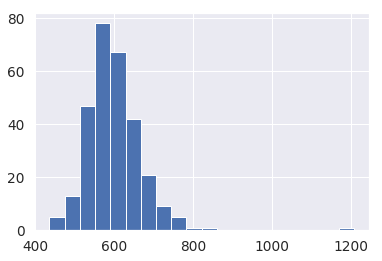

In [62]:
merged_df.query("year_float > 2017").words_per_page.hist(bins=20)

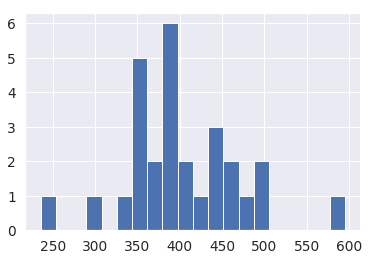

In [63]:
merged_df.query("year_float == 2011 & orientation == 90").words_per_page.hist(bins=20)

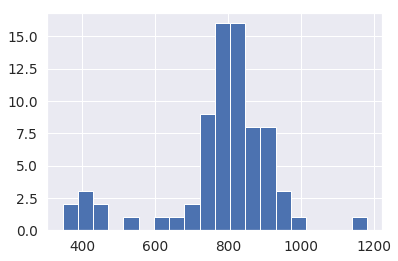

In [64]:
merged_df.query("year_float == 2011 & orientation == 0").words_per_page.hist(bins=20)

In [65]:
len(merged_df)

1669

In [66]:
merged_df.year_float.value_counts()

2018.0    185
2017.0    183
2012.0    164
2015.0    161
2016.0    140
2013.0    139
2014.0    134
2017.5    105
2011.0    102
2008.0     86
2004.0     76
2006.0     61
2010.0     58
2002.0     39
2000.0     36
Name: year_float, dtype: int64

In [67]:
merged_df_all = merged_df

In [68]:
merged_df = merged_df.query("orientation != 90")

In [69]:
merged_df = merged_df.query("(year_float > 2017) | (year_float < 2017.5 & words_per_page > 500)")

In [70]:
pd.DataFrame(merged_df_all.year.value_counts()).sort_index()

,year
2000,36
2002,39
2004,76
2006,61
2008,86
2010,58
2011,102
2012,164
2013,139
2014,134


In [71]:
merged_df.year_float.value_counts()

2018.0    185
2017.0    183
2012.0    164
2015.0    161
2016.0    140
2013.0    139
2014.0    134
2017.5    105
2008.0     86
2004.0     76
2011.0     67
2006.0     61
2010.0     58
2002.0     39
2000.0     36
Name: year_float, dtype: int64

## Export

In [72]:
merged_df.to_csv("cscw-pages-all-nopunct.csv")

In [73]:
merged_df.drop(['ref_text', 'appx_text', 'paper_text'], axis=1).to_csv("cscw-pages-notext-nopunct.csv")